In [23]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from scipy.linalg import lstsq
%matplotlib inline  


In [46]:
def compute_mean_and_std_test (model_8_predicted_y, y_test):
    num_of_samples = len(model_8_predicted_y)
    R2_score = np.zeros((num_of_samples,))
    pearson = np.zeros((num_of_samples,))
    MSE = np.zeros((num_of_samples,))
    MAE = np.zeros((num_of_samples,))
    for i in range (num_of_samples):
        y_predicted = model_8_predicted_y[i,:]
        R2_score [i] = r2_score(np.array(y_test[i,:]).reshape((-1,)), np.array(y_predicted).reshape((-1,)))
        pearson [i] = pearsonr(np.array(y_predicted).reshape((-1,)), np.array(y_test[i,:]).reshape((-1,)) )[0]
        MSE [i]= mean_squared_error(np.array(y_test[i,:]).reshape((-1,)), np.array(y_predicted).reshape((-1,)))
        MAE [i]= mean_absolute_error(np.array(y_test[i,:]).reshape((-1,)), np.array(y_predicted).reshape((-1,)))
    

    print("R2")
    std = np.std(np.array(R2_score).reshape((-1,)))
    mean = np.mean(np.array(R2_score).reshape((-1,)))
    print("mean: ", mean, " std: ", std)
    print("pearson")
    std = np.std(np.array(pearson).reshape((-1,)))
    mean = np.mean(np.array(pearson).reshape((-1,)))
    print("mean: ", mean, " std: ", std)
    print("MSE")
    std = np.std(np.array(MSE).reshape((-1,)))
    mean = np.mean(np.array(MSE).reshape((-1,)))
    print("mean: ", mean, " std: ", std)
    print("MAE")
    std = np.std(np.array(MAE).reshape((-1,)))
    mean = np.mean(np.array(MAE).reshape((-1,)))
    print("mean: ", mean, " std: ", std)

In [51]:
def train_and_test_model (X_train, X_test, y_train, y_test, model_type):
    mdl = None
    if (model_type == "linear_regression"):
        mdl = LinearRegression().fit(np.concatenate((X_train, y_train[:,0]), axis=1), y_train[:,1:])
    else:
        if (model_type == 'lasso_regression'):
            mdl = Lasso(alpha=0.0001, max_iter=1000)
            mdl.fit(np.concatenate((X_train, y_train[:,0]), axis=1), y_train[:,1:])
    print("test")
    predicted_y = mdl.predict(np.concatenate((X_test, y_test[:,0]), axis=1))
    print("pearson:",pearsonr(np.array(predicted_y).reshape((-1,)), np.array(y_test[:,1:]).reshape((-1,))))
    print("R2:",r2_score(predicted_y, y_test[:,1:]))
    print("MSE:",mean_squared_error(predicted_y, y_test[:,1:]))
    print("MAE:",mean_absolute_error(predicted_y, y_test[:,1:]))
    compute_mean_and_std_test (predicted_y, y_test[:,1:])
    print("train")
    predicted_y = mdl.predict(np.concatenate((X_train, y_train[:,0]), axis=1))
    print("pearson:",pearsonr(np.array(predicted_y).reshape((-1,)), np.array(y_train[:,1:]).reshape((-1,))))
    print("R2:",r2_score(predicted_y, y_train[:,1:]))
    print("MSE:",mean_squared_error(predicted_y, y_train[:,1:]))
    print("MAE:",mean_absolute_error(predicted_y, y_train[:,1:]))
    compute_mean_and_std_test (predicted_y, y_train[:,1:])

In [3]:
seq_PATH = "1-s2.0-S1097276517308730-mmc2.xlsx"
A_minus_normalized_levels_PATH = "1-s2.0-S1097276517308730-mmc3.xlsx"
A_plus_normalized_levels_PATH = "1-s2.0-S1097276517308730-mmc4.xlsx"
validation_seq_PATH = "validation_sequences.xlsx"
validation_A_minus_normalized_levels_PATH = "validation_normalized levels_A-.xlsx"
validation_A_plus_normalized_levels_PATH = "validation_normalized levels_A+.xlsx"

In [4]:
filename = 'RF_features_1-8kmers.sav'
Fetures = pickle.load(open(filename, 'rb'))
features = Fetures.toarray()[:, :21844]
del Fetures
y = np.matrix(pd.read_excel (A_plus_normalized_levels_PATH)) [1:90001,1:].astype('float32')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.22, random_state=31)

In [54]:
np.linalg.cond(X_train)

1.1829695627713706e+19

In [57]:
np.linalg.cond(X_train_pca)

34.49010077213819

In [58]:
np.linalg.cond(X_train_svd)

151.9045750357635

In [61]:
np.linalg.cond(X_train_svd_opt)

1029.3659112526184

In [20]:
u, s, vh = np.linalg.svd(X_train, full_matrices=False)

In [63]:
s = np.diag(s)
print (s.shape)

(21844, 21844)


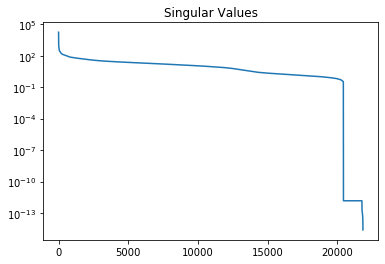

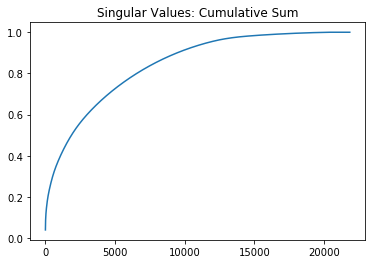

In [66]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.semilogy(np.diag(s))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(s))/np.sum(np.diag(s)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [43]:
from optht import * 
k = optht(X_train, sv=s, sigma=None)
k

Sigma unknown:
*************
approximated coefficent w(beta):  1.9212138814869963
optimal coefficent w(beta):  1.921395463971148
cutoff value:  17.806060174185763
target rank:  6899


6899

In [59]:
from sklearn.decomposition import TruncatedSVD
svd_opt = TruncatedSVD(n_components=6899, n_iter=7, random_state=42)
X_train_svd_opt = svd_opt.fit_transform(X_train)
X_test_svd_opt = svd_opt.transform(X_test)

In [60]:
print("SVD lasso")
train_and_test_model (X_train_svd_opt, X_test_svd_opt, y_train, y_test, "lasso_regression")
print("SVD linear regression")
train_and_test_model (X_train_svd_opt, X_test_svd_opt, y_train, y_test, "linear_regression")

SVD lasso
test
pearson: (0.9443356564331692, 0.0)
R2: 0.8537494548480364
MSE: 0.654406113697748
MAE: 0.578376113671468
R2
mean:  0.3296091947738701  std:  1.0895538336209023
pearson
mean:  0.890305863199541  std:  0.14034789810337975
MSE
mean:  0.6544061136977459  std:  0.8532029658706327
MAE
mean:  0.578376113671467  std:  0.35479855649036696
train
pearson: (0.9523442846654726, 0.0)
R2: 0.875289816368928
MSE: 0.5610066487244448
MAE: 0.5351732648328655
R2
mean:  0.42770291810178274  std:  0.9879456685629591
pearson
mean:  0.9065278533458833  std:  0.12291294051080955
MSE
mean:  0.5610066487244436  std:  0.7470814265272409
MAE
mean:  0.5351732648328662  std:  0.3315398136789053
SVD linear regression
test
pearson: (0.9427469931462711, 0.0)
R2: 0.8507357351599867
MSE: 0.672761601132119
MAE: 0.591392770415893
R2
mean:  0.30370535467669413  std:  1.1090487395813664
pearson
mean:  0.8861455743316701  std:  0.14192016715624947
MSE
mean:  0.6727616011321186  std:  0.8585459753322782
MAE
mean: 

In [55]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=400, n_iter=7, random_state=42)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [56]:
print("SVD lasso")
train_and_test_model (X_train_svd, X_test_svd, y_train, y_test, "lasso_regression")
print("SVD linear regression")
train_and_test_model (X_train_svd, X_test_svd, y_train, y_test, "linear_regression")

SVD lasso
test
pearson: (0.9430987828088729, 0.0)
R2: 0.8466953810863016
MSE: 0.6685583366244527
MAE: 0.5782301923319797
R2
mean:  0.32447379080720984  std:  1.1237718801357945
pearson
mean:  0.8972442979333003  std:  0.13821939218085194
MSE
mean:  0.6685583366244531  std:  0.8802793653192782
MAE
mean:  0.5782301923319801  std:  0.3632522970539041
train
pearson: (0.9430655202927625, 0.0)
R2: 0.8479347634853528
MSE: 0.6670210688673305
MAE: 0.5773706571752129
R2
mean:  0.33000323924183356  std:  1.1427275355484325
pearson
mean:  0.8970819943886483  std:  0.13983455375097215
MSE
mean:  0.6670210688673293  std:  0.8911234592975207
MAE
mean:  0.5773706571752145  std:  0.3655143299257593
SVD linear regression
test
pearson: (0.9430976296675538, 0.0)
R2: 0.8467580976753999
MSE: 0.668572093397128
MAE: 0.5783050812144197
R2
mean:  0.32431511438121524  std:  1.1243182126253022
pearson
mean:  0.8972032299493392  std:  0.1382340532057927
MSE
mean:  0.6685720933971285  std:  0.8800307010055981
MAE
m

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=400)

# fit and transform data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [52]:
print("PCA lasso")
train_and_test_model (X_train_pca, X_test_pca, y_train, y_test, "lasso_regression")
print("PCA linear regression")
train_and_test_model (X_train_pca, X_test_pca, y_train, y_test, "linear_regression")

PCA lasso
test
pearson: (0.9431838744325737, 0.0)
R2: 0.8469803018645283
MSE: 0.6675818499655104
MAE: 0.5779331341835112
R2
mean:  0.32507766650701786  std:  1.1222555148584092
pearson
mean:  0.8972683919356648  std:  0.13827716676590246
MSE
mean:  0.6675818499655102  std:  0.8782574652025729
MAE
mean:  0.5779331341835108  std:  0.3627628215358726
train
pearson: (0.9431438979200452, 0.0)
R2: 0.848190266654867
MSE: 0.6661296992613084
MAE: 0.576936948025706
R2
mean:  0.3306476082003882  std:  1.1462827707594547
pearson
mean:  0.8970905087873803  std:  0.1398099631476781
MSE
mean:  0.6661296992613067  std:  0.8908030879424893
MAE
mean:  0.5769369480257088  std:  0.36535075283265367
PCA linear regression
test
pearson: (0.9431781545491427, 0.0)
R2: 0.8470143792878895
MSE: 0.6676428686814311
MAE: 0.5780251095332389
R2
mean:  0.32482132491333343  std:  1.122813874635243
pearson
mean:  0.8972324877184495  std:  0.13828726504825176
MSE
mean:  0.6676428686814316  std:  0.8781514418268224
MAE
mea

In [57]:
mdl = LinearRegression().fit(np.concatenate((X_train, y_train[:,0]), axis=1), y_train[:,1:])
predicted_y = mdl.predict(np.concatenate((X_test, y_test[:,0]), axis=1))

SystemError: Failed to solve the system of normal equations


In [138]:
X_train_new = np.concatenate((X_train, np.full((X_train.shape[0], 1), 1)), axis=1)

In [139]:
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
p, res, rnk, s = lstsq(np.concatenate((X_train_new, y_train[:,0]), axis=1), y_train[:,1:])

In [140]:
X_test_new = np.concatenate((X_test, np.full((X_test.shape[0], 1), 1)), axis=1)

In [141]:
predicted_y = np.zeros((y_test.shape[0], 8))
for i in range(8):
    predicted_y [:,i] = np.matmul(np.concatenate((X_test_new, y_test[:,0]), axis=1), (p[:,i]))

In [142]:
print("pearson:",pearsonr(np.array(predicted_y).reshape((-1,)), np.array(y_test[:,1:]).reshape((-1,))))
print("R2:",r2_score(predicted_y, y_test[:,1:]))
print("MSE:",mean_squared_error(predicted_y, y_test[:,1:]))
print("MAE:",mean_absolute_error(predicted_y, y_test[:,1:]))

pearson: (-0.23885076377844527, 0.0)
R2: -4.375351019419085e+125
MSE: 6.110312198612535
MAE: 1.967582853466054


In [143]:
compute_mean_and_std_test (predicted_y, y_test[:,1:])

R2
mean:  -7.380894686175142  std:  15.237798852174011
pearson
mean:  -0.20845151393892014  std:  0.2352691812213125
MSE
mean:  6.110312198612333  std:  6.405289113447559
MAE
mean:  1.9675828534660538  std:  1.1636387262813488


In [145]:
predicted_y_train = np.zeros((y_train.shape[0], 8))
for i in range(8):
    predicted_y_train [:,i] = np.matmul(np.concatenate((X_train_new, y_train[:,0]), axis=1), (p[:,i]))

In [147]:
print("on train:")
print("pearson:",pearsonr(np.array(predicted_y_train).reshape((-1,)), np.array(y_train[:,1:]).reshape((-1,))))
print("R2:",r2_score(predicted_y_train, y_train[:,1:]))
print("MSE:",mean_squared_error(predicted_y_train, y_train[:,1:]))
print("MAE:",mean_absolute_error(predicted_y_train, y_train[:,1:]))

on train:
pearson: (-0.22878027992538758, 0.0)
R2: -4.346744160485906e+125
MSE: 6.097097839006497
MAE: 1.9651464816100626


In [149]:
compute_mean_and_std_test (predicted_y_train, y_train[:,1:])

R2
mean:  -7.260138490328705  std:  15.080288924314761
pearson
mean:  -0.2096584330986507  std:  0.23712947875104023
MSE
mean:  6.050800238473496  std:  6.3638923469061845
MAE
mean:  1.9569106957394535  std:  1.1596383082084476


In [29]:
p, res, rnk, s = lstsq(np.concatenate((X_train_pca, y_train[:,0]), axis=1), y_train[:,1:])
predicted_y = np.zeros((y_test.shape[0], 8))
for i in range(8):
    predicted_y [:,i] = np.matmul(np.concatenate((X_test_pca, y_test[:,0]), axis=1), (p[:,i]))
print("pearson:",pearsonr(np.array(predicted_y).reshape((-1,)), np.array(y_test[:,1:]).reshape((-1,))))
print("R2:",r2_score(predicted_y, y_test[:,1:]))
print("MSE:",mean_squared_error(predicted_y, y_test[:,1:]))
print("MAE:",mean_absolute_error(predicted_y, y_test[:,1:]))
compute_mean_and_std_test (predicted_y, y_test[:,1:])
print("on train:")
predicted_y_train = np.zeros((y_train.shape[0], 8))
for i in range(8):
    predicted_y_train [:,i] = np.matmul(np.concatenate((X_train_pca, y_train[:,0]), axis=1), (p[:,i]))
print("pearson:",pearsonr(np.array(predicted_y_train).reshape((-1,)), np.array(y_train[:,1:]).reshape((-1,))))
print("R2:",r2_score(predicted_y_train, y_train[:,1:]))
print("MSE:",mean_squared_error(predicted_y_train, y_train[:,1:]))
print("MAE:",mean_absolute_error(predicted_y_train, y_train[:,1:]))
compute_mean_and_std_test (predicted_y_train, y_train[:,1:])

pearson: (0.8690714502485642, 0.0)
R2: 0.10980670702607043
MSE: 2.1716879777418514
MAE: 1.029606758317032
R2
mean:  -1.142738590143263  std:  2.8552229013488404
pearson
mean:  0.32151668654191423  std:  0.7512328008779968
MSE
mean:  2.1716879777418496  std:  2.14053445389001
MAE
mean:  1.0296067583170339  std:  0.5600718380936729
on train:
pearson: (0.8689629423085111, 0.0)
R2: 0.12555836419167676
MSE: 2.1555962805137145
MAE: 1.026570826566957
R2
mean:  -1.0992156804992657  std:  2.7563112403832464
pearson
mean:  0.3328688639615663  std:  0.746949660164864
MSE
mean:  2.1433280199008187  std:  2.114207025233557
MAE
mean:  1.0215944109751824  std:  0.5558928948128946


In [28]:
X_train_pca_new = np.concatenate((X_train_pca, np.full((X_train_pca.shape[0], 1), 1)), axis=1)
p, res, rnk, s = lstsq(np.concatenate((X_train_pca_new, y_train[:,0]), axis=1), y_train[:,1:])
X_test_pca_new = np.concatenate((X_test_pca, np.full((X_test_pca.shape[0], 1), 1)), axis=1)
predicted_y = np.zeros((y_test.shape[0], 8))
for i in range(8):
    predicted_y [:,i] = np.matmul(np.concatenate((X_test_pca_new, y_test[:,0]), axis=1), (p[:,i]))
print("pearson:",pearsonr(np.array(predicted_y).reshape((-1,)), np.array(y_test[:,1:]).reshape((-1,))))
print("R2:",r2_score(predicted_y, y_test[:,1:]))
print("MSE:",mean_squared_error(predicted_y, y_test[:,1:]))
print("MAE:",mean_absolute_error(predicted_y, y_test[:,1:]))
compute_mean_and_std_test (predicted_y, y_test[:,1:])
print("on train:")
predicted_y_train = np.zeros((y_train.shape[0], 8))
for i in range(8):
    predicted_y_train [:,i] = np.matmul(np.concatenate((X_train_pca_new, y_train[:,0]), axis=1), (p[:,i]))
print("pearson:",pearsonr(np.array(predicted_y_train).reshape((-1,)), np.array(y_train[:,1:]).reshape((-1,))))
print("R2:",r2_score(predicted_y_train, y_train[:,1:]))
print("MSE:",mean_squared_error(predicted_y_train, y_train[:,1:]))
print("MAE:",mean_absolute_error(predicted_y_train, y_train[:,1:]))
compute_mean_and_std_test (predicted_y_train, y_train[:,1:])

pearson: (0.9431913895030141, 0.0)
R2: 0.8470503684257155
MSE: 0.6675059960383263
MAE: 0.577834071265056
R2
mean:  0.32529390905231964  std:  1.122670079759373
pearson
mean:  0.8972481629659332  std:  0.13825022602385467
MSE
mean:  0.6675059960383273  std:  0.8789030570227601
MAE
mean:  0.5778340712650578  std:  0.3627895086745033
on train:
pearson: (0.9431298810005031, 0.0)
R2: 0.8481892865031216
MSE: 0.6662890520579148
MAE: 0.5770590269086611
R2
mean:  0.3304070354514916  std:  1.1468967146381825
pearson
mean:  0.8978176267167561  std:  0.13896315141966453
MSE
mean:  0.6615985642416344  std:  0.8770696933583166
MAE
mean:  0.575598991747622  std:  0.3615623679658298


In [ ]:
from sklearn.decomposition import NMF
model = NMF(n_components=400, init='random', random_state=0)
W = model.fit_transform(X_train)
H = model.components_

In [54]:
W_test = model.transform(X_test)

In [55]:
p, res, rnk, s = lstsq(np.concatenate((W, y_train[:,0]), axis=1), y_train[:,1:])

In [56]:
predicted_y = np.zeros((y_test.shape[0], 8))
for i in range(8):
    predicted_y [:,i] = np.matmul(np.concatenate((W_test, y_test[:,0]), axis=1), (p[:,i]))
print("on train:")
print("pearson:",pearsonr(np.array(predicted_y).reshape((-1,)), np.array(y_test[:,1:]).reshape((-1,))))
print("R2:",r2_score(predicted_y, y_test[:,1:]))
print("MSE:",mean_squared_error(predicted_y, y_test[:,1:]))
print("MAE:",mean_absolute_error(predicted_y, y_test[:,1:]))

on train:
pearson: (0.9428315247841743, 0.0)
R2: 0.8455496112226808
MSE: 0.6719316970806949
MAE: 0.5783206340330033


In [57]:
X_train_NMF_new = np.concatenate((W, np.full((W.shape[0], 1), 1)), axis=1)

In [58]:
p, res, rnk, s = lstsq(np.concatenate((X_train_NMF_new, y_train[:,0]), axis=1), y_train[:,1:])

In [60]:
X_test_NMF_new = np.concatenate((W_test, np.full((W_test.shape[0], 1), 1)), axis=1)

In [61]:
predicted_y = np.zeros((y_test.shape[0], 8))
for i in range(8):
    predicted_y [:,i] = np.matmul(np.concatenate((X_test_NMF_new, y_test[:,0]), axis=1), (p[:,i]))
print("on train:")
print("pearson:",pearsonr(np.array(predicted_y).reshape((-1,)), np.array(y_test[:,1:]).reshape((-1,))))
print("R2:",r2_score(predicted_y, y_test[:,1:]))
print("MSE:",mean_squared_error(predicted_y, y_test[:,1:]))
print("MAE:",mean_absolute_error(predicted_y, y_test[:,1:]))

on train:
pearson: (0.9428150525872895, 0.0)
R2: 0.8454968906924489
MSE: 0.6721256070293821
MAE: 0.5784386355859588


In [34]:
from numpy.linalg import matrix_rank
matrix_rank(X_train) # Full rank matrix

2693